# 📝 Pattern Recognition & Biometrics. TP Apprentissage profond ou *Deep Learning*

Par Omar Galarraga et Sonia Garcia

## Étudiant : YOU Borachhun, LE Do Thanh Dat

Dans ce travail pratique, nous verrons l'intérêt des modèles d'apprentissage profond (*Deep Learning*) en les comparant à des modèles de *Machine Learning* classiques (non profonds).  

Nous voudrons identifier les animaux et les objets à partir des images de la base de données CIFAR 10 (https://www.cs.toronto.edu/%7Ekriz/cifar.html). 

Commençons par charger les données...


In [1]:
import tensorflow as tf

from tensorflow import keras
from keras import datasets
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten

(data_train, target_train), (data_test, target_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


A manière d'exemple, nous afficherons 3 images de chaque classe :

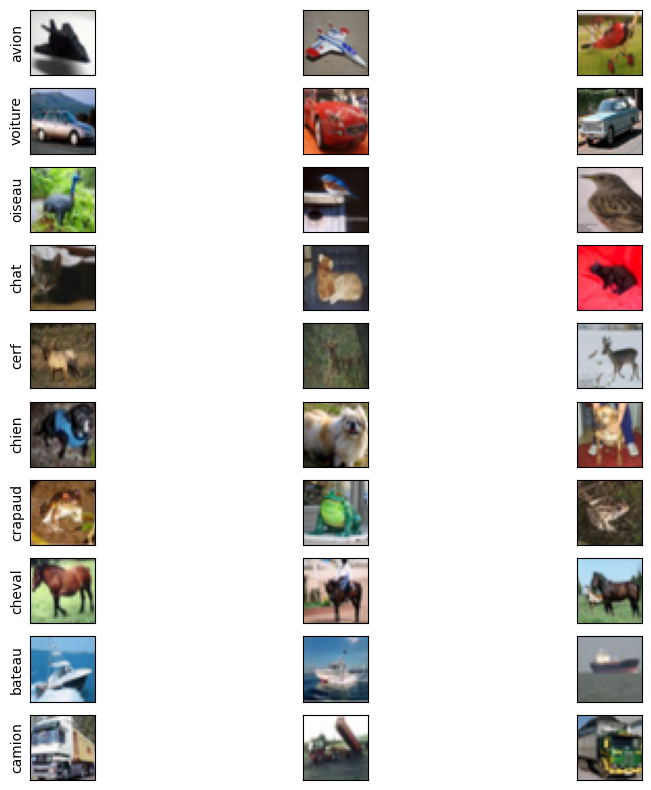

In [2]:
import matplotlib.pyplot as plt
import numpy as np
classes = ['avion', 'voiture', 'oiseau', 'chat', 'cerf', 
            'chien', 'crapaud', 'cheval', 'bateau', 'camion']

# Normalisation des valeurs des pixels entre 0 and 1
data_train, data_test = data_train / 255.0, data_test / 255.0

n_images = 3

plt.figure(figsize=(10,10))
for i in range(len(classes)):
  idx = np.where(target_train == i)
  #print(idx)
  for j in range(n_images): 
    plt.subplot(len(classes),n_images,n_images*i+j+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data_train[idx[0][j]])
    if j == 0:
        plt.ylabel(classes[target_train[idx[0][j]][0]])
plt.show()


## Partie I. *Feedforward Neural Networks* à plusieurs couches

Construisez et entraînez un réseau de neurones type Perceptron Multicouche (PMC) à $N_{H_l} = 3$ couches cachées et avec $m_1=32, m_2=16, m_3 = 16$ neurones respectivement pour les couches cachées 1, 2 et 3.

In [3]:
#Ecrivez votre code ici

model = Sequential([
    Flatten(input_shape=data_train.shape[1:]),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(len(classes), activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(data_train, target_train, epochs=20, validation_data=(data_test, target_test))

print(model.summary())

Epoch 1/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9790 - accuracy: 0.2655 - val_loss: 1.8946 - val_accuracy: 0.3066
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8231 - accuracy: 0.3370 - val_loss: 1.7968 - val_accuracy: 0.3539
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7699 - accuracy: 0.3556 - val_loss: 1.7268 - val_accuracy: 0.3749
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7257 - accuracy: 0.3746 - val_loss: 1.7014 - val_accuracy: 0.3878
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6957 - accuracy: 0.3855 - val_loss: 1.6977 - val_accuracy: 0.3841
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6744 - accuracy: 0.3932 - val_loss: 1.6694 - val_accuracy: 0.3988
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6633 - accuracy: 0.3966 - val_loss: 1.6605 - val_accuracy:

* I.1) Combien de paramètres sont-ils optimisés au total ?

**Answer:** In total there are 99306 optimized parameters.

* I.2) Quelle est la performance en apprentissage et validation ?

In [4]:
print('Training set accuracy:', model.evaluate(data_train, target_train)[1])
print('Testing set accuracy:', model.evaluate(data_test, target_test)[1])

1563/1563 [==============================] - 2s 1ms/step - loss: 1.5614 - accuracy: 0.4345
Training set accuracy: 0.43452000617980957
313/313 [==============================] - 0s 1ms/step - loss: 1.6090 - accuracy: 0.4194
Testing set accuracy: 0.41940000653266907


* I.3) Montrez la matrice de confusion

In [5]:
prediction_list = model.predict(data_test)
prediction = [np.argmax(prob_list) for prob_list in prediction_list]
print('Confusion matrix on test set:', tf.math.confusion_matrix(target_test.flatten(), prediction))

313/313 [==============================] - 0s 1ms/step
Confusion matrix on test set: tf.Tensor(
[[484  28  73  47  33  28  29  89 155  34]
 [ 63 522   2  41  19  39  28  61  67 158]
 [ 90  22 145  78 249  92 170 122  23   9]
 [ 25  32  58 243  97 188 196  77  32  52]
 [ 47  14  64  72 424  72 166 101  23  17]
 [ 18  21  53 181  99 332 140 102  33  21]
 [  6  19  45 118 165  50 542  28   9  18]
 [ 44  22  31  54 142  92  48 502  20  45]
 [161  66  17  43  17  38  16  24 547  71]
 [ 66 175   5  34  20  20  45  77 105 453]], shape=(10, 10), dtype=int32)


## Partie II. Réseaux de neurones convolutionnels (*CNN*)


Créez un CNN à l'image de *LeNet-5* (LeCun et al., 1998), qui consiste en une double alternance entre une couche convolutionnelle ($m=32$, kernel de $5x5$) et une couche de *Maximum Pooling* (kernel de $2x2$), suivie d'une couche dense ($m=64$).

In [6]:
#Ecrivez votre code ici

LeNet5 = Sequential([
    Conv2D(32, (5,5), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(32, (5,5), activation='relu'),
    MaxPooling2D((2,2)),
    Dense(64, activation='relu'),
    Flatten(),
    Dense(len(classes), activation='softmax')
])

LeNet5.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               metrics=['accuracy'])

LeNet5.fit(data_train, target_train, epochs=20, validation_data=(data_test, target_test))

print(LeNet5.summary())

Epoch 1/20
1563/1563 [==============================] - 59s 37ms/step - loss: 1.5171 - accuracy: 0.4531 - val_loss: 1.2934 - val_accuracy: 0.5377
Epoch 2/20
1563/1563 [==============================] - 59s 38ms/step - loss: 1.2228 - accuracy: 0.5691 - val_loss: 1.2211 - val_accuracy: 0.5704
Epoch 3/20
1563/1563 [==============================] - 59s 38ms/step - loss: 1.1020 - accuracy: 0.6152 - val_loss: 1.0632 - val_accuracy: 0.6277
Epoch 4/20
1563/1563 [==============================] - 59s 37ms/step - loss: 1.0126 - accuracy: 0.6465 - val_loss: 1.0488 - val_accuracy: 0.6411
Epoch 5/20
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9438 - accuracy: 0.6697 - val_loss: 1.0063 - val_accuracy: 0.6514
Epoch 6/20
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8919 - accuracy: 0.6892 - val_loss: 1.0163 - val_accuracy: 0.6528
Epoch 7/20
1563/1563 [==============================] - 60s 39ms/step - loss: 0.8395 - accuracy: 0.7062 - val_loss: 0.9584 -

* II.1) Combien de paramètres arrivent-ils en entrée de la couche dense ?

**Answer:** The dense layer has 2112 parameters.

* II.2) Combien de paramètres sont-ils entraînés au total ?

**Answer:** In total there are 46186 trained parameters.

* II.3) Quelle est la performance d'apprentissage et de validation ?

In [7]:
print('Training set accuracy:', LeNet5.evaluate(data_train, target_train)[1])
print('Testing set accuracy:', LeNet5.evaluate(data_test, target_test)[1])

1563/1563 [==============================] - 19s 12ms/step - loss: 0.5515 - accuracy: 0.8040
Training set accuracy: 0.8040000200271606
313/313 [==============================] - 4s 13ms/step - loss: 1.0505 - accuracy: 0.6757
Testing set accuracy: 0.6757000088691711


## Partie III. Transfer learning

Avec l'immense progression récente du Deep Learning, il est souvent plus intéressant de créer un modèle à partir d'un autre modèle déjà entraîné et l'ajuster (*fine-tune*) selon la tâche spécifique que l'on veut réaliser. Actuellement un large catalogue de modèles très complexes entraînés sur des bases de données de très grande taille est à disposition du public général.   

Commençons par créer un réseau type *ResNet-18* (He et al., 2015) pré-entraîné sur la base de données *ImageNet*

In [12]:
#import torch 
from tensorflow.keras.applications import ResNet50

#resnet = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True) 

ResNet50_model = ResNet50(
    include_top=False, 
    weights='imagenet', 
    input_shape= (32, 32, 3),
    pooling='avg')

tl_cnn = Sequential()
tl_cnn.add(ResNet50_model)
tl_cnn.add(Flatten())
tl_cnn.add(Dense(10, activation='softmax'))
tl_cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_5 (Flatten)         (None, 2048)              0         
                                                                 
 dense_9 (Dense)             (None, 10)                20490     
                                                                 
Total params: 23,608,202
Trainable params: 23,555,082
Non-trainable params: 53,120
_________________________________________________________________


Maintenant on ajuste le modèle pré-entraîné à notre problème spécifique (*fine-tuning*)

In [13]:
tl_cnn.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
history4 = tl_cnn.fit(data_train, target_train, epochs=5, validation_data=(data_test, target_test))

Epoch 1/5
1563/1563 [==============================] - 4310s 3s/step - loss: 1.7337 - accuracy: 0.4496 - val_loss: 2.7691 - val_accuracy: 0.5016
Epoch 2/5
1563/1563 [==============================] - 4282s 3s/step - loss: 1.4862 - accuracy: 0.5256 - val_loss: 2.0149 - val_accuracy: 0.3417
Epoch 3/5
1563/1563 [==============================] - 4160s 3s/step - loss: 1.3581 - accuracy: 0.5555 - val_loss: 8.6661 - val_accuracy: 0.4175
Epoch 4/5
1563/1563 [==============================] - 4133s 3s/step - loss: 1.2971 - accuracy: 0.5818 - val_loss: 2.8959 - val_accuracy: 0.2538
Epoch 5/5
1563/1563 [==============================] - 4142s 3s/step - loss: 1.0450 - accuracy: 0.6465 - val_loss: 2.7335 - val_accuracy: 0.1988


In [14]:
print('Training set accuracy:', tl_cnn.evaluate(data_train, target_train)[1])
print('Testing set accuracy:', tl_cnn.evaluate(data_test, target_test)[1])

1563/1563 [==============================] - 175s 112ms/step - loss: 2.7124 - accuracy: 0.2017
Training set accuracy: 0.20170000195503235
313/313 [==============================] - 33s 106ms/step - loss: 2.7335 - accuracy: 0.1988
Testing set accuracy: 0.1987999975681305


Remplissez le tableau ci-dessous selon les différentes méthodes de classification testées.

| Classifieur        | Perf Apprentissage | Perf Test | 
|--------------------|--------------------|-----------| 
| *FNN* profond      | 0.4345 | 0.4194 | 
| *CNN*              | 0.8040 | 0.6757 | 
| *ResNet50*         | 0.2017 | 0.1988 | 

* III.1) Quel est le meilleur classifieur ? Justifiez

**Answer:** Based on the above performance table, CNN (LeNet-5) is the best classifier. It is also important to note that the epochs option is set to only 5 when training the ResNet-50 model due to the high time consumption.

III.2) Question bonus : pendant quelques années les modèles ResNet ont été le *silver standard* dans la classification d'images. Plus récemment, une autre famille de modèles appelée *ConvNet* (Liu et al., 2022) a montré des meilleures performances. Refaite l'expérience précédente en partant d'un modèle *ConvNet* pré-entraîné.   

In [15]:
#Ecrivez votre code ici

from tensorflow.keras.applications import ConvNeXtLarge

ConvNeXtLarge_model = ConvNeXtLarge(
    include_top=False, 
    weights='imagenet', 
    input_shape= (32, 32, 3),
    pooling='avg')

cnl = Sequential()
cnl.add(ConvNeXtLarge_model)
cnl.add(Flatten())
cnl.add(Dense(10, activation='softmax'))
cnl.summary()

785596384/785596384 [==============================] - 24s 0us/step
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convnext_large (Functional)  (None, 1536)             196230336 
                                                                 
 flatten_6 (Flatten)         (None, 1536)              0         
                                                                 
 dense_10 (Dense)            (None, 10)                15370     
                                                                 
Total params: 196,245,706
Trainable params: 196,245,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cnl.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
cnl.fit(data_train, target_train, epochs=20, validation_data=(data_test, target_test))

**Note:** we were not able to train this model because it took too long (around 11 hours per epoch).